# Que-1
- In answering this exam I have neither taken help from anyone nor helped anyone.  

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import scipy as sp
import scipy.stats as st
import pymc3 as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

/home/sunild/anaconda3/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


# Que-2

## Part(a)
Yes, it is subjective. And that is the beauty of it. You have your own subjective prior beliefs about the problem. Although there is no perfect prior as such but in theory there is just one correct prior that captures your particular subjective belief. And this flexibility is not there in non-bayesian approaches. There is no structured way to know between equally good methods in non-bayesian approachs. But in bayesian these subjective beliefs leads to one correct prior, and this weakness that non-bayesian people criticize actually becomes its strength. 

## Part(b)

(i)\
Forall values of x in support of $X$,
$$f(x) \geq 0$$
$$\int_{0}^{\infty} f(x)=1$$
It can be checked:
$$\int_{0}^{\infty} f(x)=\int_{0}^{0.5}dx + 0.2\int_{0.5}^{1}dx+0.8\int_{1}^{2}(x-1)dx+0$$
$$=0.5+0.1+0.8\left(\frac{x^2}{2}-x\right)_{1}^{2}$$
$$=0.5+0.1+0.4=1$$
So it is a valid probability distribution function.

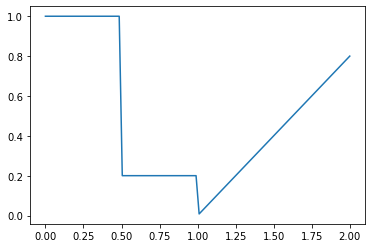

In [18]:
# (ii)
x=np.linspace(0,2,100)
y1=[1]*25
y2=[0.2]*25
y3=0.8*(x[50:]-1)
y=[]
y.extend(y1)

y.extend(y2)

y.extend(y3)


plt.plot(x,y)

(iii)
$$
E(x)=\int_{0}^{2} xf(x)dx\\
=\int_{0}^{0.5}xdx + 0.2\int_{0.5}^{1}xdx+0.8\int_{1}^{2}(x-1)xdx+0\\
=\frac{x^2}{2}|_{0}^{0.5}+0.2\frac{x^2}{2}|_{0.5}^{1}+0.8(\frac{x^3}{3}-\frac{x^2}{2})|_{1}^{2}\\
=0.87
$$

(iv)
$$
P(0.2 \leq X \leq 0.6)\\
=\int_{0.2}^{0.5}dx + 0.2\int_{0.5}^{0.6}dx\\
=0.3+0.2*0.1\\
=0.32
$$

## Part(c)

No they should test all sports persons for doping. Because there are some persons that do doping but have lost. We can get the probability that the athlete did not use drugs given the test was positive; to prove it.

# Que-3

In [22]:
import pandas as pd

In [28]:
data=pd.read_csv('accidents.csv')

In [29]:
data.head()

,Year,Accidents
0,1851,4
1,1852,5
2,1853,4
3,1854,0
4,1855,1


In [30]:
years=np.array(data.Year)
data=np.array(data.Accidents)
print(data)


[4 5 4 0 1 4 3 4 0 6 3 3 4 0 2 6 3 3 5 4 5 3 1 4 4 1 5 5 3 4 2 5 2 2 3 4 2
 1 3 2 2 1 1 1 1 3 0 0 1 0 1 1 0 0 3 1 0 3 2 2 0 1 1 1 0 1 0 1 0 0 0 2 1 0
 0 0 1 1 0 2 3 3 1 1 2 1 1 1 1 2 4 2 0 0 1 4 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1]
1.7207207207207207


### part(a)
- Note that it is count data. We **assume** that the number of accidents per year is likely to be governed by a Poisson distribution. A Poisson process has a single parameter $\lambda$ (the mean) rate. (Done in part-b) Visualizing the data suggests potentially 4 regimes throughout the years so we build a generative model with 3 transitions.

- Now to model $\lambda$ parameter of poisson dist., we could simply choose a uniform distribution with a reasonable min and max range. Here min and ax range could be min and max of accidents count. OR we could also choose an exponential distribution which has a parameter $\gamma$. For $x \geq0$, we have
$$
p(x;\gamma)=\gamma e^{-\gamma x} 
$$
- Now another question comes is how to model $\gamma$ itself. There are two ways
    1. To make matters more complicated we could model $\gamma$ by some other distribution.
    2. Or we could fix to a reasonable value. Reasonable value should cover whole range of accident counts. And range is 0 to 6. We could use mean of the data that is around 1.72; and since mean of exp. dist is $\frac{1}{\gamma}$ we have $\gamma=\frac{1}{1.72}$. We work with this approach and with this particular value.
- Then comes the question of choosing transition parameters. We could get necessary values from a uniform distribution ranging between 0 and 111(total data points)-1. Or we could use visual inspection values of transition parameters. These are fixed values explained in part-b.

In [38]:
print(data.min())
print(data.max())

0
6


In [36]:

mean_obs=data.mean()
len_obs=len(data)
print(mean_obs)
print(len_obs)

1.7207207207207207
111


### Part(b)

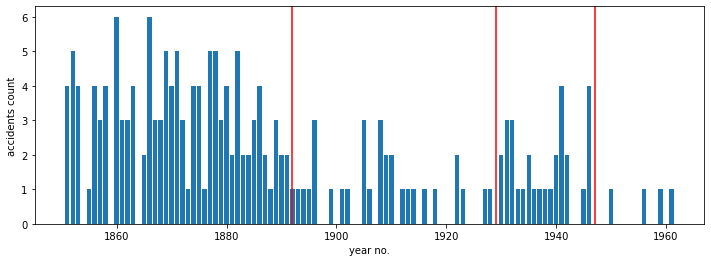

In [47]:
plt.figure(figsize=(12,4))
plt.bar(years,data)
# these values are by observations
plt.axvline(1892,c='r')
plt.axvline(1929,c='r')
plt.axvline(1947,c='r')
plt.xlabel("year no.")
plt.ylabel("accidents count")
plt.show()

In [153]:
year_data=list(years)
delta1=year_data.index(1892)
delta2=year_data.index(1929)
delta3=year_data.index(1947)
print(delta1,delta2,delta3)

41 78 96


### Part(c)

In [90]:
with pm.Model() as m1:
    lam1=pm.Exponential('lam1',lam=1/mean_obs)
    lik=pm.Poisson('lik',mu=lam1,observed=data[0:delta1])
    sample1=pm.sample(5000,tune=1000)

with pm.Model() as m2:
    lam2=pm.Exponential('lam2',lam=1/mean_obs)
    lik=pm.Poisson('lik',mu=lam2,observed=data[delta1:delta2])
    sample2=pm.sample(5000,tune=1000)

with pm.Model() as m3:
    lam3=pm.Exponential('lam3',lam=1/mean_obs)
    lik=pm.Poisson('lik',mu=lam3,observed=data[delta2:delta3])
    sample3=pm.sample(5000,tune=1000)

with pm.Model() as m4:
    lam4=pm.Exponential('lam4',lam=1/mean_obs)
    lik=pm.Poisson('lik',mu=lam4,observed=data[delta3:len_obs])
    sample4=pm.sample(5000,tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam1]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam2]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam3]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam4]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 6 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lam1,3.082,0.273,2.575,3.606,0.003,0.002,8087.0,13434.0,1.0


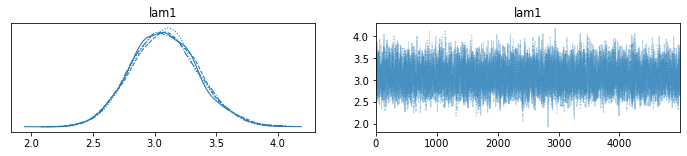

In [91]:
az.plot_trace(sample1)
az.summary(sample1)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lam2,0.852,0.152,0.568,1.128,0.002,0.001,8441.0,13017.0,1.0


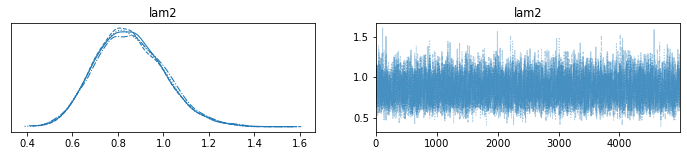

In [92]:
az.plot_trace(sample2)
az.summary(sample2)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lam3,1.607,0.29,1.089,2.18,0.003,0.002,8015.0,12837.0,1.0


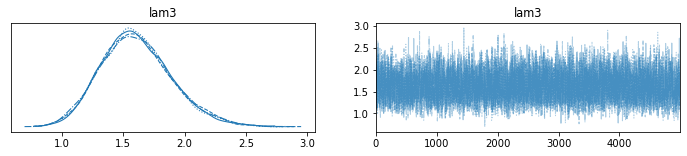

In [93]:
az.plot_trace(sample3)
az.summary(sample3)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lam4,0.323,0.144,0.079,0.584,0.001,0.001,9123.0,10389.0,1.0


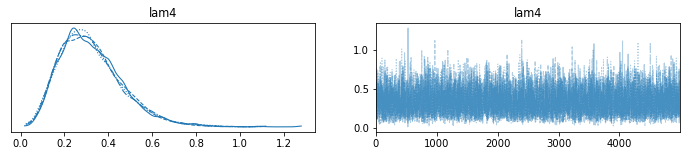

In [94]:
az.plot_trace(sample4)
az.summary(sample4)

### Part(d)

- In all four cases we get gamma distribution, since exponential is simply a special case of gamma dist. And conjugate prior of poisson is gamma distribution, so we get posterior to be gamma itself.
- 
$$
 f ( x ) = \frac{β^α}{Γ ( α )} x^{α − 1} e^{− β x} 
$$
- posterior gamma is;
$$
Gamma(\alpha+\sum_{i=1}^{n_k}x_i,\beta+n_k)
$$

In [148]:
beta_value=1/mean_obs
alpha_value=1
data1=data[0:delta1]
data2=data[delta1:delta2]
data3=data[delta2:delta3]
data4=data[delta3:len_obs]

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


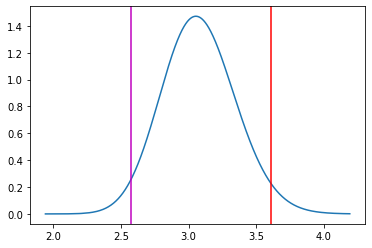

In [149]:
x=np.sort(sample1.get_values('lam1'))
y=sp.stats.gamma.pdf(x,a=alpha_value+sum(data1),scale=1/(beta_value+len(data1)))
plt.plot(x,y)
plt.axvline(az.summary(sample1)['hdi_97%'].values[0],c='r')
plt.axvline(az.summary(sample1)['hdi_3%'].values[0],c='m')

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


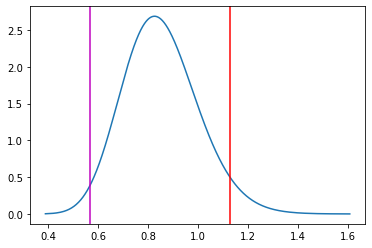

In [150]:

x=np.sort(sample2.get_values('lam2'))
y=sp.stats.gamma.pdf(x,a=alpha_value+sum(data2),scale=1/(beta_value+len(data2)))
plt.plot(x,y)
plt.axvline(az.summary(sample2)['hdi_97%'].values[0],c='r')
plt.axvline(az.summary(sample2)['hdi_3%'].values[0],c='m')

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


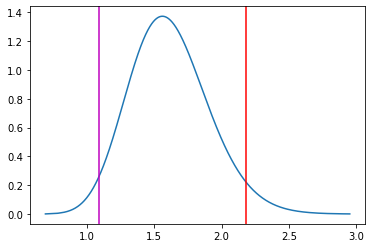

In [151]:

x=np.sort(sample3.get_values('lam3'))
y=sp.stats.gamma.pdf(x,a=alpha_value+sum(data3),scale=1/(beta_value+len(data3)))
plt.plot(x,y)
plt.axvline(az.summary(sample3)['hdi_97%'].values[0],c='r')
plt.axvline(az.summary(sample3)['hdi_3%'].values[0],c='m')

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


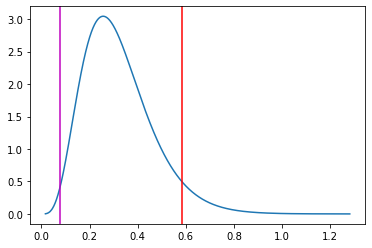

In [152]:

x=np.sort(sample4.get_values('lam4'))
y=sp.stats.gamma.pdf(x,a=alpha_value+sum(data4),scale=1/(beta_value+len(data4)))
plt.plot(x,y)
plt.axvline(az.summary(sample4)['hdi_97%'].values[0],c='r')
plt.axvline(az.summary(sample4)['hdi_3%'].values[0],c='m')

### Part(e)

In [158]:
n1=np.array(st.poisson.rvs(mu=az.summary(sample1)['mean'], size=delta1))
n2=np.array(st.poisson.rvs(mu=az.summary(sample2)['mean'], size=delta2-delta1))
n3=np.array(st.poisson.rvs(mu=az.summary(sample3)['mean'], size=delta3-delta2))
n4=np.array(st.poisson.rvs(mu=az.summary(sample4)['mean'], size=111-delta3))
gdata=np.concatenate((n1,n2,n3,n4))
print(gdata)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


[4 1 4 2 5 2 1 1 3 3 3 2 2 0 6 6 2 2 4 2 2 2 4 2 3 5 1 2 5 3 3 5 2 6 3 3 5
 0 3 2 5 0 0 1 1 1 1 2 1 1 0 0 0 1 0 1 1 1 0 0 0 0 2 0 0 2 0 0 0 1 0 1 0 0
 1 1 1 2 3 1 0 2 4 1 0 3 3 1 1 1 2 1 2 1 0 3 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]


(0.0, 111.0)

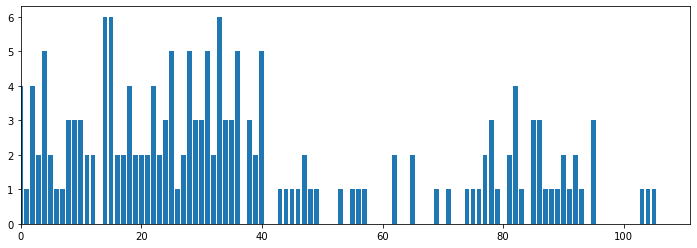

In [159]:
plt.figure(figsize=(12,4))
plt.bar(np.arange(111),gdata)
plt.xlim(0, 111)

- It does seem to give similar kind of values for data, here we used posterior samples for mean.
- They are very near to the visual observed values of part-b.